In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import pandas as pd
import math
from scipy.signal import argrelextrema
import xraydb
import pickle

## Loading Data - NO ALLOY
### Loading new low res data

In [55]:
#Loading in old low res data
data_low_res = pd.read_csv(r"..\Data\24-01-2023\Plates Mo Source.csv",skiprows=0)

#all the column names
column_names_data_low_res_inital = ['E_1 / keV', 'Cu Plate', 'Mo Source', 'Ag Plate', 'Zr Plate',
       'Zn Plate', 'Ni Plate', 'Fe Plate', 'FeCr Alloy Plate',
       'Tin Maybe Plate', 'Titanium Plate', 'Cu Maybe', 'Tin Maybe Plate.1',
       'Mo Plate']


#These are the columns we will use as we have better high res data for other elements. (Ignoring alloys for this section)
column_names_data_low_res_search = ['Cu Plate', 'Ag Plate', 'Zr Plate',
       'Zn Plate']


low_res_atomic_number = [29, 47, 40, 30]

energy_low_res_x = data_low_res['E_1 / keV']

### Loading new high res data

In [32]:
#Loading in old high res data
data_high_res = pickle.load(open(r'..\Data\02-02-2023\MEGA DATA.pkl', 'rb'))

#all the column names
column_names_data_high_res = ['E_1 / keV', 'Mo plate cal', 'Cu straight through calibrate',
       'Unknown - Tungsten (W)', 'Unknown - Ti', 'Pb', ' In +  plastic',
       'Tin/Copper', 'Fe Alloy', 'Iron Zinc', 'Pure Iron',
       'Gold (Ganel’s pendant)', 'Iron Nickel', 'Gold (Ganel’s chain)',
       'Nickel (Tulsi’s Ring)', 'inconclusive (Ben’s Ring)',
       'Manganin (Cu Mn Ni)', 'Iron (with possible mixing)',
       'Stainless steel ', 'Solder (tin)', 'Nickel-Brass (Ganel’s Key)',
       '50 Florint ', '10 peso (Copper Zinc)', 'Israel (Copper Zinc Nickel)',
       'HK Dollar', '5 Euro Cent (primarily copper)', 'Indium', 'Pure Iron.1',
       'Pure Nickel']

energy_high_res_x = data_high_res['E_1 / keV']

#These are the other elements we think we have identified. (Ignoring alloys for this section)
column_names_data_high_res_search = ['Mo plate cal',
       'Unknown - Tungsten (W)', 'Unknown - Ti', 'Pb', 'Pure Iron', 'Gold (Ganel’s pendant)', 'Solder (tin)','Indium',
       'Pure Nickel']

high_res_atomic_number = [42,74,22,82, 26, 79, 50,49, 28]


The list of elements we have in order of smallest to largest atomic number. I have not considered alloys yet:
Ti(21), Fe(26), Ni(28), Cu(29), Zn(30), Zr(40), Mo(42), Ag(47), In(49), Sn(50), W(74), Au(79), Pb(82)

## Analysis Of Energy Lines
We have to determine which lines we expect to see in the range 2 keV - 35 keV. For example the L lines will be in this range for heavier elements, and others only K lines.

First step is to plot all the data, im going to plot the low res first. I will overlay the theoretical characteristic energy peaks over the graphs to determine what we can resolve.

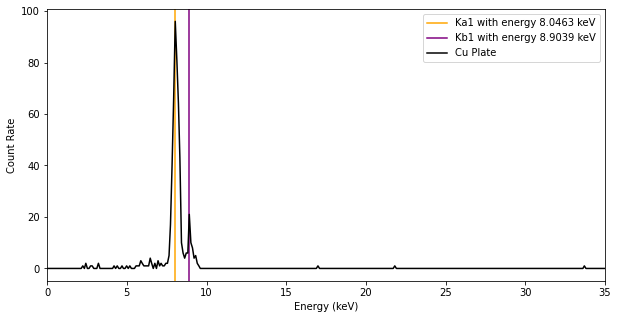

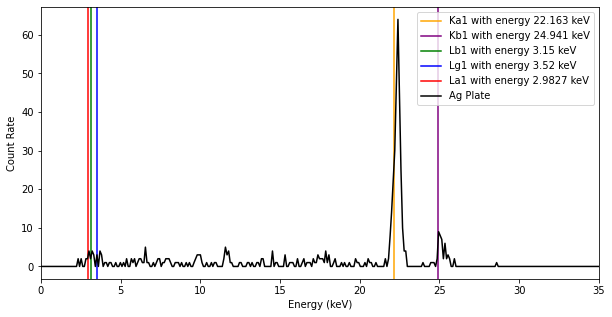

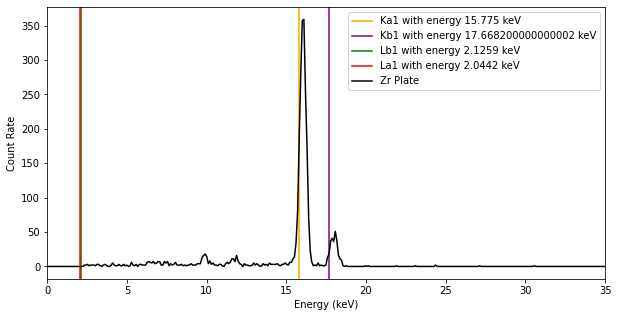

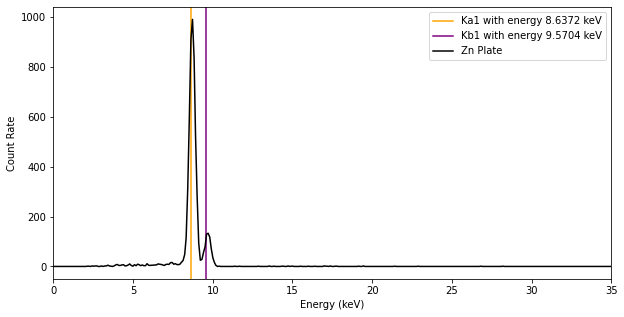

In [80]:
def print_features(name,line):
    print(name)
    print(line.energy)
    #print(line.intensity)

elements_low_res = ['Cu', 'Ag', 'Zr', 'Zn']
for i,column_name in enumerate(column_names_data_low_res_search):
    plt.figure(i, figsize=(10,5))

    for name, line in xraydb.xray_lines(elements_low_res[i]).items():
        if line.energy > 2e3 and line.energy < 35e3:
            if name == 'Ka1' or name == 'Kb1' or name == 'La1' or name == 'Lb1'or name == 'Lg1':
                #print_features(name,line)
                energy_val = (line.energy)/1e3
                color = ''
                if name == 'Ka1':
                    color = 'orange'
                elif name == 'Kb1':
                    color = 'purple'
                elif name == 'La1':
                    color = 'red'
                elif name == 'Lb1':
                    color = 'green'
                elif name == 'Lg1':
                    color = 'blue'
                plt.axvline(energy_val, label = f'{name} with energy {energy_val} keV', color = color)

    count_rate = data_low_res[column_name]
    plt.plot(energy_low_res_x,count_rate, label = column_name, color = 'black')

    

    plt.xlabel(r'Energy (keV)')
    plt.ylabel('Count Rate')
    plt.xlim(left = 0, right = 35)
    plt.legend()
    plt.show()

We see for these elements all $k_{\alpha}$ and $k_{\beta}$ lines can be resolved. There is not enough signal amplitude in the small energy range for Zr and Ag to differentiate the signal and noise.


Next we will plot all the high res data.

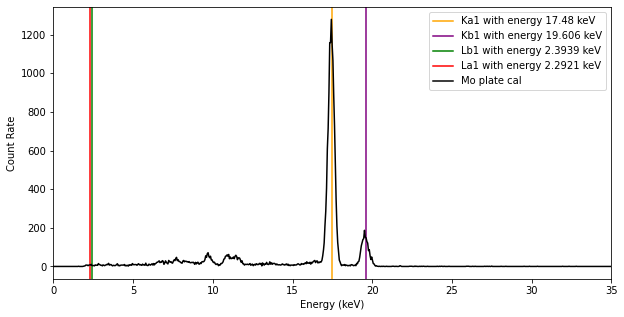

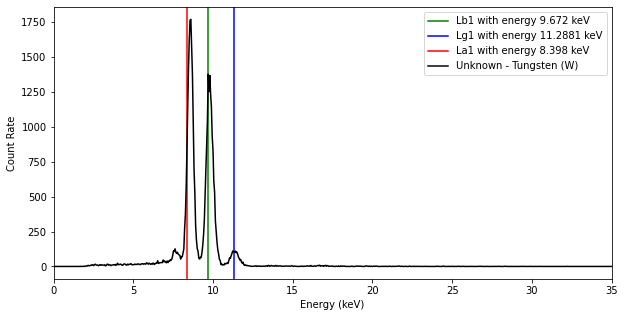

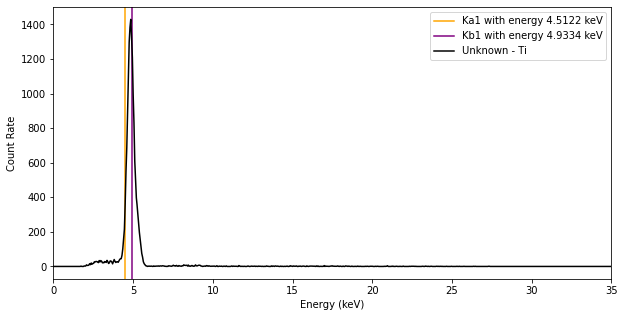

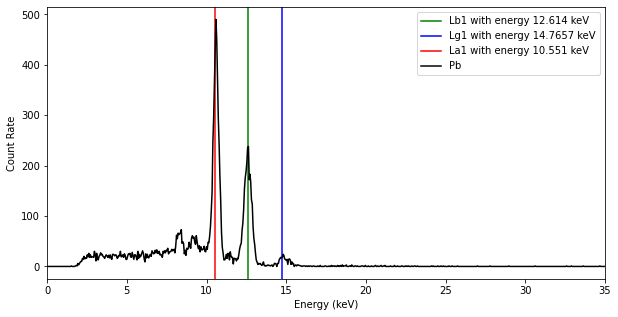

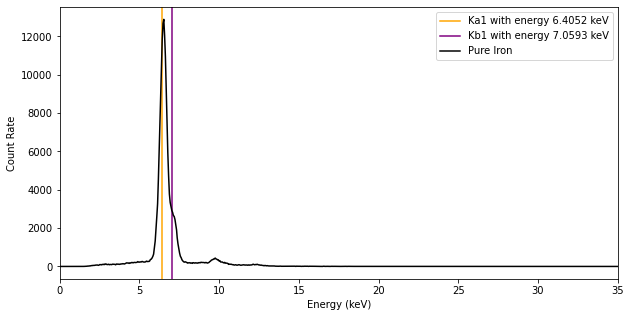

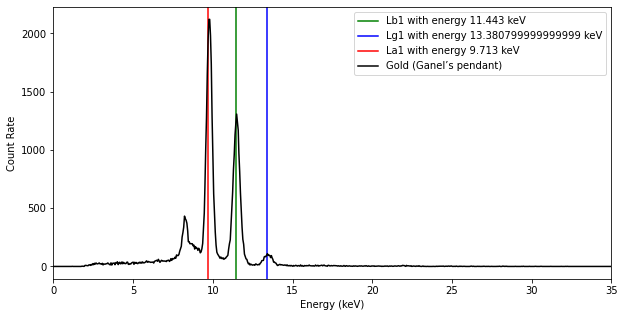

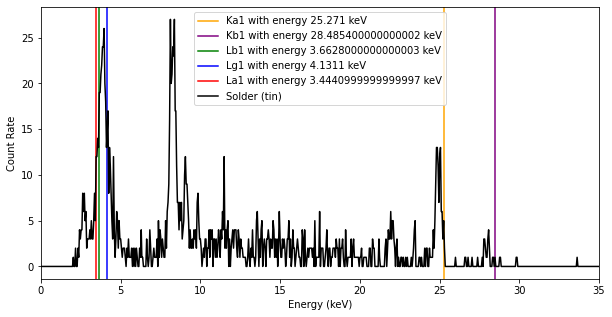

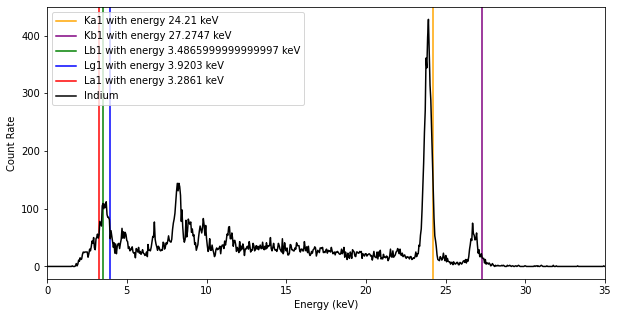

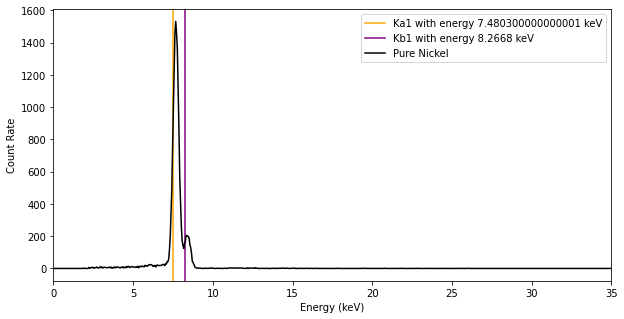

In [73]:
elements_high_res = ['Mo', 'W', 'Ti', 'Pb', 'Fe', 'Au', 'Sn', 'In', 'Ni']
for i,column_name in enumerate(column_names_data_high_res_search):
    plt.figure(i, figsize=(10,5))

    for name, line in xraydb.xray_lines(elements_high_res[i]).items():
        if line.energy > 2e3 and line.energy < 35e3:
            if name == 'Ka1' or name == 'Kb1' or name == 'La1' or name == 'Lb1'or name == 'Lg1':
                #print_features(name,line)
                energy_val = (line.energy)/1e3
                color = ''
                if name == 'Ka1':
                    color = 'orange'
                elif name == 'Kb1':
                    color = 'purple'
                elif name == 'La1':
                    color = 'red'
                elif name == 'Lb1':
                    color = 'green'
                elif name == 'Lg1':
                    color = 'blue'
                plt.axvline(energy_val, label = f'{name} with energy {energy_val} keV', color = color)

    count_rate = data_high_res[column_name]
    plt.plot(energy_high_res_x,count_rate, label = column_name, color = 'black')


    plt.xlabel(r'Energy (keV)')
    plt.ylabel('Count Rate')
    plt.xlim(left = 0, right = 35)
    plt.legend()
    plt.show()

Below is a table which shows what lines we are table to get from our data.


| Element | $k_{\alpha}$ | $k_{\beta}$ | $L_{\alpha}$ | $L_{\beta}$ | $L_{\gamma}$ |
|:-------:|:--:|:--:|:--:|:--:|:--:|
|    Mo   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    W    | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ |
|    Ti   | $\times$ | $\times$ | $\times$ | $\times$ | $\times$ |
|    Pb   | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ |
|    Fe   | $\times$ | $\times$ | $\times$ | $\times$ | $\times$ |
|    Au   | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ |
|    Sn   | $\times$ | $\times$ | $\times$ | $\times$ | $\times$ |
|    In   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    Ni   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |


The issue we have is for Ti, Fe and Sn we are unable to resolve any lines due to them being close together or too noisey. So I will look at the low res data to see if its better.

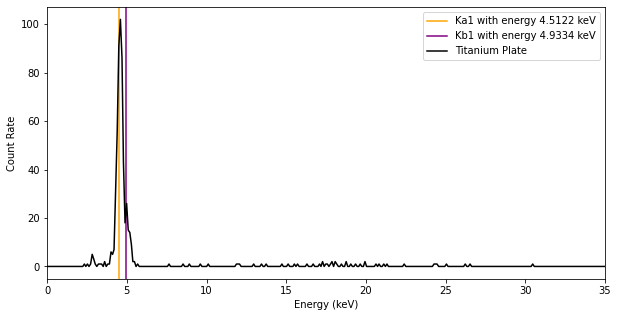

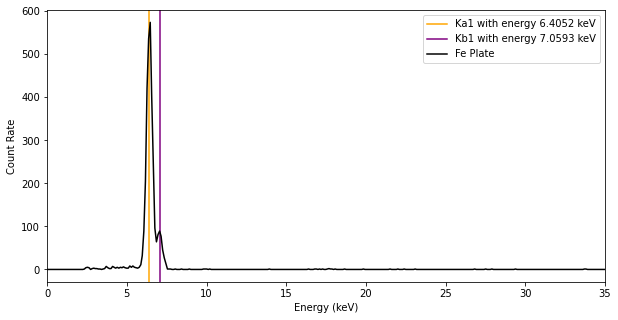

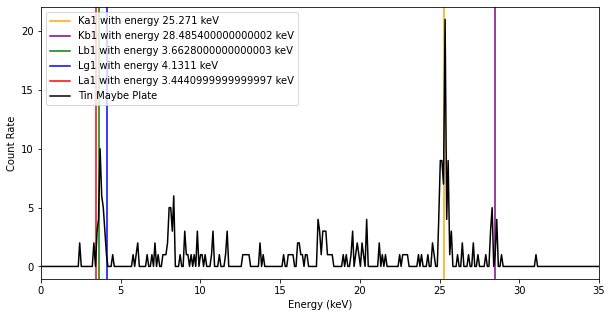

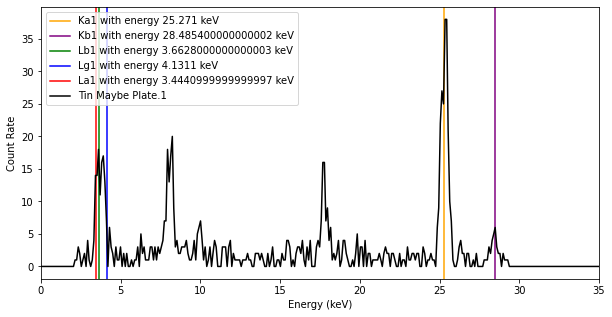

In [79]:
columns_to_loop = ['Titanium Plate', 'Fe Plate', 'Tin Maybe Plate','Tin Maybe Plate.1']


elements_low_res = ['Ti', 'Fe', 'Sn', 'Sn']
for i,column_name in enumerate(columns_to_loop):
    plt.figure(i, figsize=(10,5))

    for name, line in xraydb.xray_lines(elements_low_res[i]).items():
        if line.energy > 2e3 and line.energy < 35e3:
            if name == 'Ka1' or name == 'Kb1' or name == 'La1' or name == 'Lb1'or name == 'Lg1':
                #print_features(name,line)
                energy_val = (line.energy)/1e3
                color = ''
                if name == 'Ka1':
                    color = 'orange'
                elif name == 'Kb1':
                    color = 'purple'
                elif name == 'La1':
                    color = 'red'
                elif name == 'Lb1':
                    color = 'green'
                elif name == 'Lg1':
                    color = 'blue'
                plt.axvline(energy_val, label = f'{name} with energy {energy_val} keV', color = color)

    count_rate = data_low_res[column_name]
    plt.plot(energy_low_res_x,count_rate, label = column_name, color = 'black')



    plt.xlabel(r'Energy (keV)')
    plt.ylabel('Count Rate')
    plt.xlim(left = 0, right = 35)
    plt.legend()
    plt.show()

From these graphs it shows that the low res data allows us to resolve peaks for $k_{\alpha}$ and $k_{\beta}$ lines, which makes me think the high res data had an too large of a count rate. It is also import to note that for Tin, the ''Tin Maybe Plate.1' is better than the Tin Maybe Plate' for resolving the $k_{\alpha}$ and $k_{\beta}$ lines but the peaks for the L emission lines are too close together to resolve.

## Conclusion

At max we need to plot 3 gaussians. It seems like we will have 5 lines on moseleys graph, however some lines will have a very small number of points such as the $L_{\gamma}$ lines.

WHAT WE CAN RESOLVE:-

Using high res data:

| Element | $k_{\alpha}$ | $k_{\beta}$ | $L_{\alpha}$ | $L_{\beta}$ | $L_{\gamma}$ |
|:-------:|:--:|:--:|:--:|:--:|:--:|
|    Mo(42)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    W(74)    | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ |
|    Pb(82)   | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ |
|    Au(47)   | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ |
|    In(49)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    Ni(28)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |

Using low res data:

| Element | $k_{\alpha}$ | $k_{\beta}$ | $L_{\alpha}$ | $L_{\beta}$ | $L_{\gamma}$ |
|:-------:|:--:|:--:|:--:|:--:|:--:|
|    Cu(29)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    Ag(47)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    Zr(40)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    Zn(30)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    Ti(21)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    Fe(26)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |
|    Sn(50)   | $\checkmark$ | $\checkmark$ | $\times$ | $\times$ | $\times$ |

### Dummy Random Code

In [66]:
array_of_elements = ['Ti', 'Fe', 'Ni', 'Cu', 'Zn', 'Zr', 'Mo', 'Ag', 'In', 'Sn', 'W', 'Au', 'Pb']
# for i in range(len(array_of_elements)):
#     print(f'{array_of_elements[i]} --------------')
#     for name, line in xraydb.xray_lines(array_of_elements[i], 'L3').items():
#         print(name)
#         print(line)

for name, line in xraydb.xray_lines('Au').items():
    if line.energy > 2e3 and line.energy < 35e3:
        print(f'{name} = {line}')
        # if name == 'Ka1':
        #     print(name)
        #     print(line.energy)
        #     print(line.intensity)
        # elif name == 'Kb1':
        #     print(name)
        #     print(line.energy)
        #     print(line.intensity)
        # elif name == 'La1':
        #     print(name)
        #     print(line.energy)
        #     print(line.intensity)
        # elif name == 'Lb1':
        #     print(name)
        #     print(line.energy)
        #     print(line.intensity)
        # elif name == 'Lc1':
        #     print(name)
        #     print(line.energy)
        #     print(line.intensity)

Lb4 = XrayLine(energy=11205.0, intensity=0.328877, initial_level='L1', final_level='M2')
Lb3 = XrayLine(energy=11610.0, intensity=0.419432, initial_level='L1', final_level='M3')
Lg2 = XrayLine(energy=13710.3, intensity=0.107082, initial_level='L1', final_level='N2')
Lg3 = XrayLine(energy=13806.7, intensity=0.144608, initial_level='L1', final_level='N3')
Ln = XrayLine(energy=10309.0, intensity=0.0178699, initial_level='L2', final_level='M1')
Lb1 = XrayLine(energy=11443.0, intensity=0.798815, initial_level='L2', final_level='M4')
Lg1 = XrayLine(energy=13380.8, intensity=0.161187, initial_level='L2', final_level='N4')
Lg6 = XrayLine(energy=13729.0, intensity=0.022128, initial_level='L2', final_level='O4')
Ll = XrayLine(energy=8494.0, intensity=0.0363102, initial_level='L3', final_level='M1')
La2 = XrayLine(energy=9628.0, intensity=0.0772639, initial_level='L3', final_level='M4')
La1 = XrayLine(energy=9713.0, intensity=0.692087, initial_level='L3', final_level='M5')
Lb6 = XrayLine(energy=1

In [52]:
xraydb.fluor_yield('Zr', 'L1', 'M2', 19606)

(0.0068, 0.0, 1)

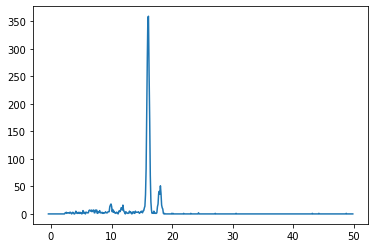

In [33]:


plt.plot(energy_low_res_x,data_low_res['Zr Plate'])
plt.show()